In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer



In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
data= pd.read_csv("C:\\Users\\Sanjay\\Desktop\\New folder\Dataset\\amazon_alexa.tsv", delimiter='\t')

In [6]:
data.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [7]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [8]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [9]:
data['rating'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [10]:
data['Polarity rating']= data['rating'].apply(lambda x: 'Positive' if x>3 else('Neutral' if x==3 else 'Neagative'))

In [11]:
data.head(3)

,rating,date,variation,verified_reviews,feedback,Polarity rating
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,Positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,Positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,Positive


<AxesSubplot:xlabel='rating', ylabel='count'>

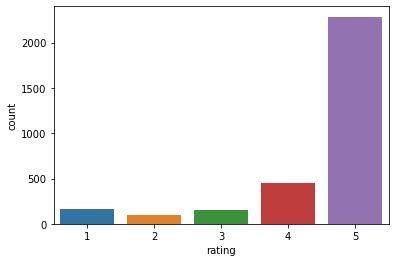

In [12]:
sns.countplot(x= data['rating'], data=data)

<AxesSubplot:xlabel='Polarity rating', ylabel='count'>

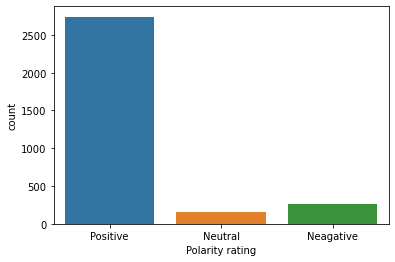

In [13]:
sns.countplot(x= data['Polarity rating'], data=data)

In [14]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
corpus = []
for i in range(0, len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
len(corpus)

3150

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x = cv.fit_transform(corpus).toarray()

In [18]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
tfidf = TfidfTransformer()
X = tfidf.fit_transform(x)
X = tfidf.transform(x)

In [20]:
X

<3150x2765 sparse matrix of type '<class 'numpy.float64'>'
	with 35253 stored elements in Compressed Sparse Row format>

In [21]:
y = data['feedback']

In [22]:
X.shape

(3150, 2765)

In [23]:
y.shape

(3150,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [26]:
y_pred = model.predict(X_test)

In [27]:
import seaborn as sns

C:\Users\Sanjay\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

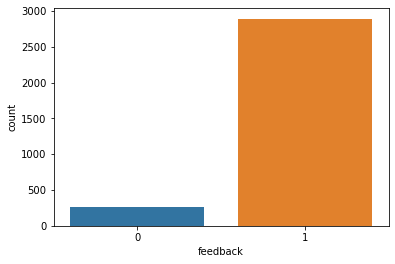

In [28]:
sns.countplot(data['feedback'], data=data)

In [29]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()

In [30]:
X, y = SM.fit_resample(X, y)


In [31]:
X.shape

(5786, 2765)

In [32]:
y.shape

(5786,)

C:\Users\Sanjay\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='feedback', ylabel='count'>

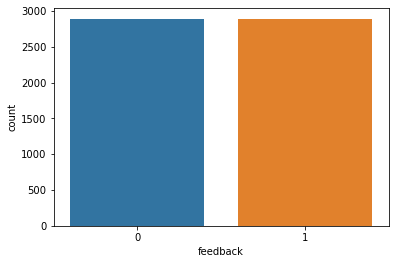

In [33]:
sns.countplot(y, data=data)

In [34]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X, y, test_size=0.30, random_state=42)

In [35]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_sm, y_train_sm)

MultinomialNB()

In [36]:
y_pred = model.predict(X_test_sm)

In [37]:
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_sm, y_pred)
cm

array([[819,  26],
       [106, 785]], dtype=int64)

In [39]:
from sklearn.metrics import classification_report
cr = classification_report(y_test_sm, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       845
           1       0.97      0.88      0.92       891

    accuracy                           0.92      1736
   macro avg       0.93      0.93      0.92      1736
weighted avg       0.93      0.92      0.92      1736



In [40]:
def check(msg):
    v = cv.transform([msg])
    prec = model.predict(v)
    return prec

In [41]:
check('bad experience')

array([0], dtype=int64)